# Data Import

In [1]:
# Libraries import
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Data import
data = pd.read_csv('https://raw.githubusercontent.com/ashutosh-DS25/Tata-Steel-Machine-Failure-Prediction/main/train.csv')

In [80]:
data.sample(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
60288,60288,M22107,M,300.0,310.1,1496,38.2,199,0,0,0,0,0,0
2161,2161,L56447,L,298.2,308.8,1458,41.4,28,0,0,0,0,0,0
83615,83615,L56352,L,297.7,308.9,1573,40.1,0,0,0,0,0,0,0
113116,113116,L54158,L,300.7,311.1,1567,41.0,137,0,0,0,0,0,0
85284,85284,L52352,L,304.2,313.4,1740,34.2,150,0,0,0,0,0,0
46743,46743,M23977,M,297.3,308.1,1641,36.9,206,0,0,0,0,0,0
134363,134363,M22344,M,300.3,311.0,1312,53.4,151,0,0,0,0,0,0
9452,9452,L51810,L,303.0,311.2,1583,35.7,196,0,0,0,0,0,0
102454,102454,L47832,L,297.7,309.2,1533,44.5,159,0,0,0,0,0,0
89574,89574,L47398,L,298.3,308.5,1504,43.7,108,0,0,0,0,0,0


In [4]:
# Renaming column names to full forms
data.rename(columns = {'TWF': 'Tool Wear Failure',
             'HDF': 'Heat Dissipation Failure',
             'PWF': 'Power Failure',
             'OSF': 'Overstrain Failure',
             'RNF': 'Random Failures'}, inplace= True)

# Data Overview

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        136429 non-null  int64  
 1   Product ID                136429 non-null  object 
 2   Type                      136429 non-null  object 
 3   Air temperature [K]       136429 non-null  float64
 4   Process temperature [K]   136429 non-null  float64
 5   Rotational speed [rpm]    136429 non-null  int64  
 6   Torque [Nm]               136429 non-null  float64
 7   Tool wear [min]           136429 non-null  int64  
 8   Machine failure           136429 non-null  int64  
 9   Tool Wear Failure         136429 non-null  int64  
 10  Heat Dissipation Failure  136429 non-null  int64  
 11  Power Failure             136429 non-null  int64  
 12  Overstrain Failure        136429 non-null  int64  
 13  Random Failures           136429 non-null  i

In [6]:
data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Tool Wear Failure,Heat Dissipation Failure,Power Failure,Overstrain Failure,Random Failures
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations


*   Air temperature is the only column with high spread.
*   Torque is the only column with medium spread and all other columns have low spread values.
*   None of the column looks like having an outlier value by observing the minimum and maximum values.


In [7]:
# Null value count in each factor
data.isnull().sum()

,0
id,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
Tool Wear Failure,0


In [8]:
# Numeber of dplicate rows in data
data.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis (EDA)

In [9]:
# Libraries import
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Create a new data frame containing numeric columns only
num_data= data.drop(columns = ['id','Product ID', 'Type'])

<Axes: >

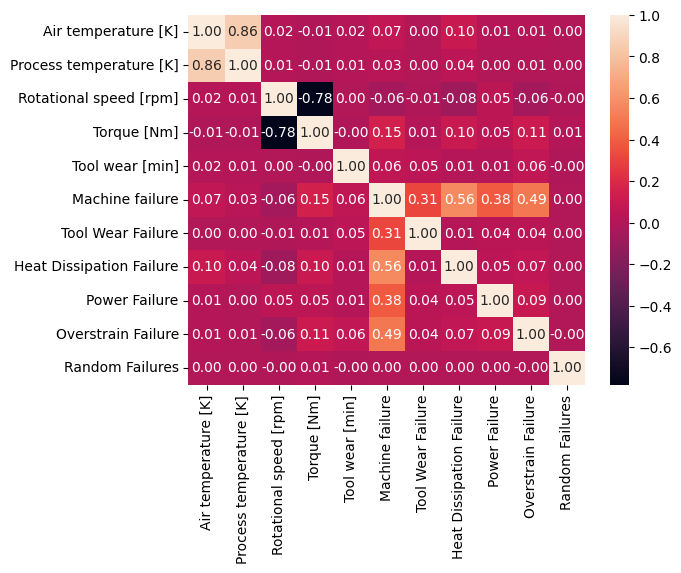

In [11]:
# Display degree of correlation among different factors using Heatmap
sns.heatmap(data = num_data.corr(), annot = True, fmt=".2f")

**Obeservation**

* Machine Failure is showing a good correlation with factors like Tool wear failure, Heat Dissipation Failure, Power Failure and Overstrain Failure.
* Torque and Rotaional Speed have a high negative correlation
* Air temperature and Process temperature are showing a high correlation.

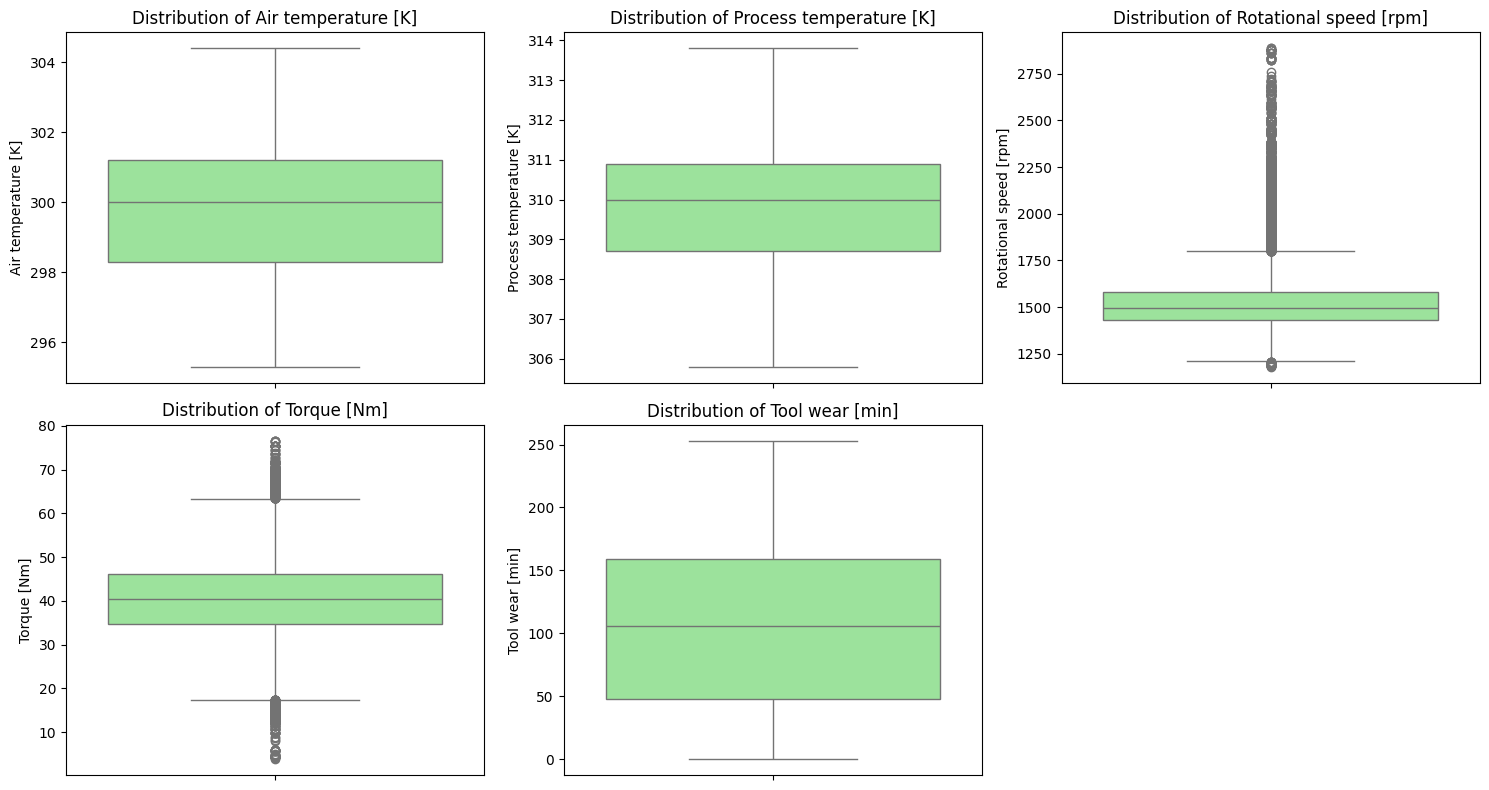

In [12]:
# Analyse distribution of the numerical factors using boxplot
num_cols = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.boxplot(y = data[col], ax = axes[i], color = "lightgreen")
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel('')

for j in range(i+1,len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Observation:**

All the factors are well distributed.

Air temperature and process temperature have a minimal deviation and median value is around 300.

Rotational speed and torque have some extreme values indicating some machines have rpm or torque more varied than usual cases.

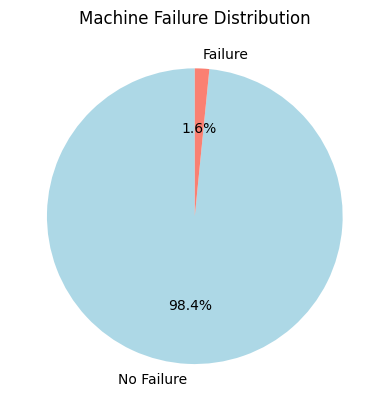

In [13]:
# Analyse machine failure cases compared to non-failure cases
data["Machine failure"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'salmon'],
    labels=['No Failure', 'Failure']
)
plt.title("Machine Failure Distribution")
plt.ylabel("")
plt.show()

**Observation**: Machine Failure cases are rare compared to normal cases.

In [14]:
# Slice name of columns that contain specific failure
failure_cols = data.columns[9:14]

# Plot relationship between a specific failure and overall machine failure
for col in failure_cols:
    # Filter rows where specific failure has ocurred
    temp = data[data[col] == 1]
    fig = px.histogram(temp, x=col, color='Machine failure', barmode='group', text_auto=True)
    fig.update_layout(title=f'{col} vs Machine Failure', xaxis_title='', yaxis_title='Count', width = 600, height = 400)
    fig.update_xaxes(showticklabels=False)
    fig.show()

**Observation:**

Plots are strongly indicating that all the different failures are causing overall machine failure as there are very few specific failures where overall machine failure is marked as false.

Random Failure cases are different from other failure cases as there are only 4 random failure cases that are marked as overall machine failure.

# Model Training and Evaluation

## Required packages import

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, roc_auc_score

from imblearn.ensemble import BalancedRandomForestClassifier

## Splitting and transformer

*Section Purpose:*

After Splitting the data into dependent and independent fetaures we will be using Standard scaler to normalize the values in the numeric features.

We will use One Hot Encoding to encode Type column as there are only 3 categories and One Hot Encoder is best suited for low cardinality features.

All the tranformations will be handled by the column transformer for easy integration into different pipelines.

In [17]:
# definig dependent and independent features
X = data.drop(columns = ['id','Product ID','Machine failure'])
y = data['Machine failure']

In [18]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [19]:
# Column transformer with Standard Scaler and One Hot Encoder applied on specific columns
preprocessor = ColumnTransformer(
    [('standard scaler', StandardScaler(),X.columns[1:6]),
     ('onehotencode',OneHotEncoder(),['Type'])],
    remainder = 'passthrough'
)

## Baseline model training

**Section Purpose**

Training multiple models with minimal tuning and comparing recall score and precision as performance metrics for a model trained on imbalanced data.

In [20]:
# dictionary of models for looping
models = {
    'Logistic Regressor': LogisticRegression(max_iter = 1000, random_state = 42),
    'Random Forest': RandomForestClassifier(max_depth = 6, n_estimators = 100, random_state = 42),
    'Gradient Boosting': GradientBoostingClassifier(max_depth = 6, n_estimators = 100, random_state = 42),
    'XG Boost':XGBClassifier(max_depth = 6, scale_pos_weight = 6, n_estimators = 100, random_state = 42, verbose = -1),
    'Light GBM': LGBMClassifier(scale_pos_weight = 6, max_depth = 6, n_estimators = 100, random_state = 42, verbose = -1)
}

In [21]:
# model training using for loop
result = []
for name, model in models.items():
  pipe = Pipeline([('preprocessor', preprocessor),
                   ('model', model)])
  pipe.fit(X_train, y_train)
  pred = pipe.predict(X_test)

  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  print('Algorithm: ',name)
  print(confusion_matrix(y_test,pred))
  print(classification_report(y_test, pred))
  print('*'*30)

  result.append([name, accuracy, precision, recall, f1])

result_df = pd.DataFrame(result, columns = ['name','accuracy','precision','recall','f1'])
print(result_df)

Algorithm:  Logistic Regressor
[[26845     3]
 [  103   335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.76      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286

******************************
Algorithm:  Random Forest
[[26846     2]
 [  102   336]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.87       438

    accuracy                           1.00     27286
   macro avg       1.00      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286

******************************
Algorithm:  Gradient Boosting
[[26832    16]
 [  104   334]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     2

**Section Conclusion**

Metrics shows that all the models have similar performance on the data. Accuracy score and precision is as high as 99% but the recall score is comparatively lesser ranging between 76 to 78 percent.

This difference is because of the imbalance in the data as positive(true) cases are very less in numbers compared to negative cases. To handle this imbalance we can try techniques of oversampling to improve the recall.

This model is useful if machines checking up process is costlier than actual machine failure cost as out of all the cases that are predicted as failure, 90 to 99 percent actually came out as an actual machine failure case.

## Oversampling using SMOTE

**Section purpose**

Oversample the machine failure cases using SMOTE and compare model performance.

In [22]:
# Initialize SMOTE to oversample minority class samples to 20% of majority class
smote = SMOTE(sampling_strategy = 0.2, random_state = 42)

In [23]:
# Initialize models in a dictionary
imb_models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000, random_state = 1000),
    'Light GBM': LGBMClassifier(max_depth = 6, n_estimators = 100, random_state = 42),
    'XG Boost': XGBClassifier(max_depth = 6, n_estimators = 100, random_state = 42)
}

In [24]:
# Apply column transformer on train and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [25]:
# Resample train data using SMOTE
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [26]:
# Fit resampled data into model and print metrics
smote_result = []
for name, model in imb_models.items():
  pipe = imbPipeline([('model', model)])
  pipe.fit(X_res, y_res)
  pred = pipe.predict(X_test_encoded)

  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  smote_result.append([accuracy, precision,recall, f1])

smote_result_df = pd.DataFrame(smote_result, columns = ['accuracy','precision','recall','f1' ])
print(smote_result_df)

   accuracy  precision    recall        f1
0  0.995895   0.963068  0.773973  0.858228
1  0.995456   0.926630  0.778539  0.846154
2  0.994539   0.856790  0.792237  0.823250


**Observation**

Performance of models after applying SMOTE is unchanged and similar to baseline models.

## Adjusting class weights for handling class imbalance

In [27]:
# Initialize models in a dictionary
models = {
    'Random Forest': RandomForestClassifier(max_depth = 6, n_estimators = 100, class_weight = {0:1,1:70}, random_state = 42),
    'XG Boost':XGBClassifier(max_depth = 6, scale_pos_weight = 70, n_estimators = 100, random_state = 42, verbosity = 0),
    'Light GBM': LGBMClassifier(scale_pos_weight = 70, max_depth = 150, n_estimators = 100, random_state = 42)
}

In [28]:
# Train model and evaluate performance
result = []
for name, model in models.items():
  pipe = Pipeline([('preprocessor', preprocessor),
                   ('model', model)])
  pipe.fit(X_train, y_train)
  pred = pipe.predict(X_test)

  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  print(name)
  print(confusion_matrix(y_test,pred))
  print(classification_report(y_test, pred))
  print('*'*30)

  result.append([name, accuracy, precision, recall, f1])

result_df = pd.DataFrame(result, columns = ['name','accuracy','precision','recall','f1'])
print(result_df)

Random Forest
[[25493  1355]
 [   58   380]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     26848
           1       0.22      0.87      0.35       438

    accuracy                           0.95     27286
   macro avg       0.61      0.91      0.66     27286
weighted avg       0.99      0.95      0.96     27286

******************************
XG Boost
[[26551   297]
 [   86   352]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     26848
           1       0.54      0.80      0.65       438

    accuracy                           0.99     27286
   macro avg       0.77      0.90      0.82     27286
weighted avg       0.99      0.99      0.99     27286

******************************
Light GBM
[[26311   537]
 [   70   368]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     26848
           1       0.41      0.84      0.55      

In this section we have tried to handle the class imbalance using the class weights or class scaling parameters provided by the algorithms.

Class weight of 1:70 has been applied as frequency of claas 0 is 62 times of 1 and we want a model to predict the failures better keeping in mind the trade off between recall and precision.

**Model analysis**

Random Forest and Light GBM has shown an improvement in the recall values. In case of Random Forest the recall value has increased to 86% but precision has reduced to 22%. This model can be useful in a case where machine failure cost is higher than machine's complete checking up cost.

Light GBM with scaling positive cases to 70 times is giving most balanced model till now as precision is maintained to 41% and recall is 84% hence the trade off between both is balanced given priority of identifying machines at risk is higher along with giving due importance to the fact that complete analysis of machines might also cost high.

## Handling class imbalance using Oversampler and Undersampler

In [29]:
# Targets for oversampling
majority_target = 60000
minority_current = 2148
minority_target = 1800 * 3

In [30]:
# Initialize undersampler and oversampler with sampling targets
rus = RandomUnderSampler(sampling_strategy = {0:majority_target}, random_state = 42)
ros = RandomOverSampler(sampling_strategy = {1 : minority_target}, random_state = 42)

In [31]:
# Initialize stratified k fold balanced sampling while cross validation
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Define scoring parameters
scorer = {
    'recall': make_scorer(recall_score, pos_label = 1),
    'precision' : make_scorer(precision_score, pos_label = 1),
    'f1' : make_scorer(f1_score, pos_label = 1)
    }

In [32]:
# Initialize models
models = {
    'Balanced Random Forest': BalancedRandomForestClassifier(max_depth =6, n_estimators = 1000),
    'XG Boost':XGBClassifier(max_depth = 6, n_estimators = 100, random_state = 42),
    'Light GBM': LGBMClassifier(max_depth = 6, n_estimators = 100, random_state = 42)
}

In [33]:
# Train models and cross validate the metrics on 5 folds
for name, model in models.items():
  pipe = imbPipeline([('preprocessor',preprocessor),
                      ('under sample', rus),
                      ('over sample', ros),
                      ('model', model)])
  results = cross_validate(pipe, X, y, scoring =scorer, cv = skf, n_jobs = -1)
  print(name)
  print('Recall scores 5 fold: ',results['test_recall'])
  print('Precision scores 5 fold:', results['test_precision'])
  print('f1 scores 5 fold', results['test_f1'])
  print('-'*35)


Balanced Random Forest
Recall scores 5 fold:  [0.87179487 0.86744186 0.89302326 0.85116279 0.84615385]
Precision scores 5 fold: [0.23670886 0.23400251 0.24227129 0.25311203 0.23165284]
f1 scores 5 fold [0.37232454 0.36857708 0.38114144 0.3901919  0.36372745]
-----------------------------------
XG Boost
Recall scores 5 fold:  [0.78787879 0.78372093 0.81860465 0.76976744 0.77389277]
Precision scores 5 fold: [0.86445013 0.89153439 0.90956072 0.87105263 0.8972973 ]
f1 scores 5 fold [0.82439024 0.83415842 0.86168911 0.81728395 0.8310388 ]
-----------------------------------
Light GBM
Recall scores 5 fold:  [0.78321678 0.78372093 0.81627907 0.75581395 0.78321678]
Precision scores 5 fold: [0.92561983 0.91576087 0.89540816 0.93123209 0.90322581]
f1 scores 5 fold [0.84848485 0.84461153 0.8540146  0.83440308 0.83895131]
-----------------------------------


In this section we are using undersampling and oversampling to handle the class imabalance and we have also used cross validation to check the peformance on multiple folds.

Rather than Random Forest we are using Balanced Random Forest here as it is a improved version of Random forest in case of class imbalance.

Balanced random forest is giving better recall but precision is low around 23%.
There is miniamal or no effect of oversampling on XG Boost and Light GBM.

## Tuning Balanced Random Forest using Random Search CV

In [34]:
# Initialize model
model = BalancedRandomForestClassifier(random_state = 42)

In [35]:
# custom metric function that gives more weightage to recall
def custom_metric(y_true, y_pred):
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  return 0.9 * recall + 0.1 * precision

custom_scorer = make_scorer(custom_metric, greater_is_better = True)

In [36]:
# Set of Random Forest hyperparameters to be tuned using RandomizedSearchCV
param_dist = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [5, 10, 15, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None],
    'model__sampling_strategy': ['auto', 0.5, 0.7, 1.0],
    'model__replacement': [True, False]
}

In [37]:
# Initialize pipeline with preprocessor and model
pipe = imbPipeline([('preprocessor', preprocessor),
                    ('model', model)])

In [38]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = pipe,
    cv = 3,
    param_distributions = param_dist,
    n_iter = 25,
    scoring = custom_scorer,
    refit = True,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)

In [39]:
# Fit data to RandomizedSearchCV to find best combination of hyperparameters
random_search.fit(X,y)
print(random_search.best_params_)
print(random_search.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'model__sampling_strategy': 1.0, 'model__replacement': False, 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': None}
0.8214113220003924


In [40]:
# Initialize BalancedRandomForestClassifier with tuned hyperparameters
opt_balanced_random_forest = BalancedRandomForestClassifier(n_estimators = 100,
                                                            max_depth = None,
                                                            min_samples_split = 5,
                                                            min_samples_leaf= 1,
                                                            max_features = 'log2',
                                                            sampling_strategy = 1,
                                                            replacement = False)

In [41]:
# Train model and evaluate performance
pipe = Pipeline([('preprocessor', preprocessor),
                 ('model',opt_balanced_random_forest)])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[25271  1577]
 [   51   387]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     26848
           1       0.20      0.88      0.32       438

    accuracy                           0.94     27286
   macro avg       0.60      0.91      0.65     27286
weighted avg       0.99      0.94      0.96     27286



In [42]:
# Extract feature importance from the trained model
importances = pipe.named_steps['model'].feature_importances_
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
df_feature_importance = pd.DataFrame({
    'Feature' : feature_names,
    'Importance': importances
})
df_feature_importance = df_feature_importance.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)
print(df_feature_importance)

                                     Feature  Importance
0    standard scaler__Rotational speed [rpm]    0.222016
1               standard scaler__Torque [Nm]    0.196557
2           standard scaler__Tool wear [min]    0.115333
3        remainder__Heat Dissipation Failure    0.098866
4              remainder__Overstrain Failure    0.096262
5                   remainder__Power Failure    0.075570
6       standard scaler__Air temperature [K]    0.075174
7               remainder__Tool Wear Failure    0.065558
8   standard scaler__Process temperature [K]    0.044245
9                       onehotencode__Type_L    0.003983
10                      onehotencode__Type_M    0.003301
11                      onehotencode__Type_H    0.002544
12                remainder__Random Failures    0.000591


Here we are tuning the model using Randomized Search CV to optimize the performance of Balanced Random Forest Classifier on the data.
Model tuning has improved the recall but because of the trade off precision is reducing to 20% for positive cases.

## RandomForest and RandomisedSearchCV

In [43]:
# Initialize Random Forest Classifier
model = RandomForestClassifier()

In [44]:
pipe = Pipeline([('preprocessor', preprocessor),
                 ('model', model)])

In [45]:
# Define dictionary of hyperparameters that will be tuned using RandomizedSearchCV
param_grid = {
    'model__n_estimators': [100, 400, 600],
    'model__max_depth': [5, 10, 15, 20, None],
    'model__min_samples_split': [2,4,7],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2'],
    'model__bootstrap': [True, False],
    'model__class_weight':[
        None,
        {0:1, 1:5},
        {0:1, 1:20},
        {0:1, 1:50},
        {0:1, 1:90},
        {0:1, 1:140},
    ]
}

In [46]:
# Definig dictionary of scoring parameters for RandomizedSearchCV
scoring = {
    'recall': make_scorer(recall_score, average = 'binary'),
    'precision' : make_scorer(precision_score, average = 'binary'),
    'f1' : make_scorer(f1_score, average = 'binary')
}

In [47]:
random_search = RandomizedSearchCV(
    estimator = pipe,
    param_distributions = param_grid,
    n_iter = 30,
    scoring = custom_scorer,
    refit = True,
    cv = 2,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)

In [48]:
# Fit data on RandomizedSearchCV and find tuned hyperparameters for Random Forest
%%time
random_search.fit(X,y)
print('best params ', random_search.best_params_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
best params  {'model__n_estimators': 100, 'model__min_samples_split': 7, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__class_weight': {0: 1, 1: 90}, 'model__bootstrap': True}
CPU times: user 12.8 s, sys: 1.29 s, total: 14.1 s
Wall time: 23min 34s


In [64]:
# Train model with tuned hyperparameters
random_forest = RandomForestClassifier(
    n_estimators = 100,
    min_samples_split = 7,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    max_depth = 5,
    class_weight = {0: 1, 1: 90},
    bootstrap = True,
    random_state = 42
)

In [65]:
# Fit the model on training data and evaluate its performance on test data.
pipe = Pipeline([('preprocessor', preprocessor),
                    ('model', random_forest)])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24384  2464]
 [   51   387]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     26848
           1       0.14      0.88      0.24       438

    accuracy                           0.91     27286
   macro avg       0.57      0.90      0.59     27286
weighted avg       0.98      0.91      0.94     27286



After tuning the Random Forest Classifier we are getting a high recall and low precision model.

In [66]:
# Extract feature importance from the model
importances = pipe.named_steps['model'].feature_importances_
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
df_importances = pd.DataFrame({
    'Importance': importances,
    'Feature': feature_names
})
df_importance = df_importances.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)
print(df_importance)

    Importance                                   Feature
0     0.249946   standard scaler__Rotational speed [rpm]
1     0.208198              standard scaler__Torque [Nm]
2     0.125152       remainder__Heat Dissipation Failure
3     0.097229             remainder__Overstrain Failure
4     0.096359                  remainder__Power Failure
5     0.088987          standard scaler__Tool wear [min]
6     0.074634              remainder__Tool Wear Failure
7     0.048016      standard scaler__Air temperature [K]
8     0.009028  standard scaler__Process temperature [K]
9     0.001368                      onehotencode__Type_L
10    0.000576                      onehotencode__Type_M
11    0.000360                      onehotencode__Type_H
12    0.000147                remainder__Random Failures


## Performance Comparision After Removing Least Important Factors

### Model Performance After Removing Two Least Important Factors

In [67]:
# Define preprocessor including dropper to drop the features 'Type' and 'Random Failures'
preprocessor_filtered = ColumnTransformer([('scaling', StandardScaler(),X.columns[1:6]),
                                  ('dropper', 'drop', ['Type', 'Random Failures'])],
                                 remainder = 'passthrough')

# Fit data on tuned Balanaced Random Forest Classifier
pipe = imbPipeline([('preprocessor',preprocessor_filtered),
                    ('model', opt_balanced_random_forest)])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

# Evaluate performace of model
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



[[25271  1577]
 [   47   391]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     26848
           1       0.20      0.89      0.33       438

    accuracy                           0.94     27286
   macro avg       0.60      0.92      0.65     27286
weighted avg       0.99      0.94      0.96     27286



In [68]:
# Train tuned Random Forest after dropping 2 least important featrues under preprocessing
pipe = Pipeline([('preprocessor', preprocessor_filtered),
                 ('model', random_forest)])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24896  1952]
 [   54   384]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     26848
           1       0.16      0.88      0.28       438

    accuracy                           0.93     27286
   macro avg       0.58      0.90      0.62     27286
weighted avg       0.98      0.93      0.95     27286



### Model Performance After Removing Six Least Important Factors

In [69]:
# Define preprocessor to drop 6 least important features
preprocessor_filtered = ColumnTransformer([('scaling', StandardScaler(),X.columns[1:6]),
                                  ('dropper', 'drop', ['Type', 'Random Failures','Process temperature [K]','Air temperature [K]','Power Failure','Tool Wear Failure'])],
                                 remainder = 'passthrough')

# Train tuned Balanaced Random Forest Classifier
pipe = imbPipeline([('preprocessor',preprocessor_filtered),
                    ('model', opt_balanced_random_forest)])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Train tuned Random Forest Classifier
pipe = Pipeline([('preprocessor', preprocessor_filtered),
                    ('model', random_forest)])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[24611  2237]
 [   56   382]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     26848
           1       0.15      0.87      0.25       438

    accuracy                           0.92     27286
   macro avg       0.57      0.89      0.60     27286
weighted avg       0.98      0.92      0.94     27286

[[23836  3012]
 [   54   384]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     26848
           1       0.11      0.88      0.20       438

    accuracy                           0.89     27286
   macro avg       0.56      0.88      0.57     27286
weighted avg       0.98      0.89      0.93     27286



After removing two least factors the model performance is unchanged, and removing six factors is causing slight reduction in model performance as precision is falling without any improvement in the recall.

Dimensionality of data is not very high and feature reduction is not showing any significant improvement in the performance so keeping all the features in final model will be safer.

# Model Comparision and Prediction

## Model Comparision using Cross Validation

In [70]:
models = {
    'Random Forest (with class weights)': RandomForestClassifier(max_depth = 6, n_estimators = 100, class_weight = {0:1, 1:70}),
    'Light GBM (with class weights)': LGBMClassifier(scale_pos_weight = 70, max_depth = 150, n_estimator = 100),
    'Balanced Random Forest (Under and over sampling)':  BalancedRandomForestClassifier(max_depth = 6, n_estimators = 1000),
    'Balanced Random Forest (Tuned)': BalancedRandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 5, min_samples_leaf = 1, max_features = 'log2', sampling_strategy = 1, replacement = False)
}

# Create scoring to capture precision, recall and f1 score while performing cross validation
scoring = {'precision': 'precision', 'recall':'recall', 'f1':'f1'}

In [71]:
# Compare the performance of the best models using different preprocessing strategies in a loop
for name, model in models.items():
  if 'over sampling' in name:
    pipe = imbPipeline([('preprocessor', preprocessor),
                        ('under sampler', rus),
                        ('over sampler', ros),
                        ('model', model)])
  else:
    pipe = Pipeline([('preprocessor', preprocessor),
                        ('model', model)])
  results = cross_validate(pipe, X, y, cv= 5, scoring = scoring)
  print(name)
  print('Recall score 5 fold', results['test_recall'])
  print('Precision scores 5 fold', results['test_precision'])
  print('Mean Recall:', np.mean(results['test_recall']))
  print('Mean Precision:', np.mean(results['test_precision']))
  print('='*45)

Random Forest (with class weights)
Recall score 5 fold [0.87878788 0.85348837 0.87906977 0.8627907  0.84848485]
Precision scores 5 fold [0.22373887 0.22529159 0.22580645 0.23115265 0.22276622]
Mean Recall: 0.864524312896406
Mean Precision: 0.2257511559588546
Light GBM (with class weights)
Recall score 5 fold [0.85314685 0.83255814 0.83953488 0.85116279 0.82983683]
Precision scores 5 fold [0.41449604 0.39645626 0.3812038  0.41169854 0.41156069]
Mean Recall: 0.8412478993874343
Mean Precision: 0.403083065192845
Balanced Random Forest (Under and over sampling)
Recall score 5 fold [0.86713287 0.86046512 0.87209302 0.86511628 0.84615385]
Precision scores 5 fold [0.23830878 0.23901809 0.24146813 0.24668435 0.23834537]
Mean Recall: 0.8621922263782729
Mean Precision: 0.2407649423197929
Balanced Random Forest (Tuned)
Recall score 5 fold [0.90909091 0.86511628 0.89069767 0.89069767 0.89277389]
Precision scores 5 fold [0.20175892 0.19630607 0.20415778 0.19661191 0.20329087]
Mean Recall: 0.88967528

After comparing all the best performing models Light GBM is most balanced model that is maintaining a good recall and a significant precision score but we are going with the assumption that failure of big machineries in a steel production factory would cost more so we will prioritise better recall than precision. Hence we will predict our Final Test Data using Balanced Random Forest with tuned parameters.

## Final Data Prediction

In [81]:
# Data import
test_data = pd.read_csv('https://raw.githubusercontent.com/ashutosh-DS25/Tata-Steel-Machine-Failure-Prediction/main/test.csv')

In [82]:
# Renaming column names to full forms
test_data.rename(columns = {'TWF': 'Tool Wear Failure',
                            'HDF': 'Heat Dissipation Failure',
                            'PWF': 'Power Failure',
                            'OSF': 'Overstrain Failure',
                            'RNF': 'Random Failures'}, inplace= True)

In [83]:
test_data.sample(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Tool Wear Failure,Heat Dissipation Failure,Power Failure,Overstrain Failure,Random Failures
64455,200884,L47518,L,297.5,308.2,1388,50.5,15,0,0,0,0,0
47661,184090,L51806,L,303.0,311.2,1594,32.9,76,0,0,0,0,0
39723,176152,L50475,L,301.1,310.2,1533,42.1,54,0,0,0,0,0
81744,218173,L54863,L,300.7,311.7,1352,43.5,62,0,0,0,0,0
80473,216902,M22381,M,300.2,311.6,1663,33.6,23,0,0,0,0,0


In [75]:
# Predict test data using Balanced Random Forest Classifier with tuned hyperparameters
model = BalancedRandomForestClassifier(n_estimators = 100,
                                       max_depth = None,
                                       min_samples_split = 5,
                                       min_samples_leaf = 1,
                                       max_features = 'log2',
                                       sampling_strategy = 1,
                                       replacement = False)
pipe = Pipeline([('preprocessor', preprocessor),
                 ('model', model)])
pipe.fit(X_train, y_train)
Predicted_Data = pipe.predict(test_data)

In [76]:
# Convert predictions to series
Predicted_Machine_Failure = pd.Series(Predicted_Data)

In [77]:
# Total values in data
test_data.shape[0]

90954

In [78]:
# Show the distribution of predicted machine failure classes
Predicted_Machine_Failure.value_counts()

,count
0,84711
1,6243
